**Follow the above steps to find dividends, dividend growth rate, and DCF of  5 stocks in SET50, namely**




1.  PTT
2.  AOT
3.  KBANK
4.  CPALL
5.  ADVANC



---


**Here, you will use only the data from 2016-01-01 to 2020-12-31




In [32]:
import pandas as pd
from pandas_datareader import data
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%mathplotlib inline
%config InlineBackend.figure_format='retina'

UsageError: Line magic function `%mathplotlib` not found.


In [33]:
df = data.DataReader('PTT.bk', data_source="yahoo", 
start='2016-01-01', 
end='2020-12-31')
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,25.000000,23.799999,24.799999,23.799999,57964000.0,19.659714
2016-01-05,24.100000,22.500000,23.900000,22.700001,88229000.0,18.751074
2016-01-06,22.900000,22.200001,22.500000,22.799999,65320000.0,18.833673
2016-01-07,21.600000,20.600000,21.500000,20.900000,182186000.0,17.264202
2016-01-08,21.700001,20.900000,21.299999,21.500000,108961000.0,17.759827


Text(0, 0.5, 'Difference in Change')

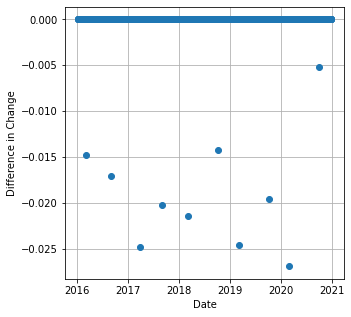

In [34]:

adj_close = df['Adj Close'] # adjusted close prices
pct_adj_close = adj_close.pct_change(1) # find daily percent changes 
close = df['Close'] # close price
pct_close = close.pct_change(1) # find daily percent changes 
plt.figure(figsize=(5,5))
plt.plot(pct_close- pct_adj_close, "o")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Difference in Change")

In [35]:
delta = pct_close- pct_adj_close 
threshold = -0.001 # We pick threshold = -0.001 from the graph.
delta = delta[delta<threshold] # screen only the location where differences is less than -0.001
print("The dividens are paid out on:")
for date in delta.index:
  print(date.date())

The dividens are paid out on:
2016-03-03
2016-08-31
2017-03-29
2017-08-31
2018-03-06
2018-10-11
2019-03-06
2019-10-10
2020-03-04
2020-09-30


In [36]:
dividends =[]
for date in delta.index:
  k = np.nonzero(df.index==date)[0][0] # find the row where dividends have been paid.
  close_before = close[k-1]
  pct_close_div = pct_close[k]
  pct_adj_div = pct_adj_close[k]
  dividend = close_before * ( pct_adj_div - pct_close_div)
  dividends.append(dividend)
dividends = pd.Series(dividends, index=delta.index)
print(dividends)

Date
2016-03-03    0.404463
2016-08-31    0.601726
2017-03-29    1.002538
2017-08-31    0.810151
2018-03-06    1.204359
2018-10-11    0.766922
2019-03-06    1.198742
2019-10-10    0.892978
2020-03-04    1.095838
2020-09-30    0.174176
dtype: float64


In [37]:
yearly_dividends = []
for y in range(2016,2021): # Find dividens growth rate in the last 5 years.
  dividend_year = dividends[dividends.index.year == y] #filter only one year
  yearly_dividends.append(dividend_year.sum()) # find total dividens per year
yearly_dividends = pd.Series(yearly_dividends, index=np.arange(2016,2021))
dividend_growth = yearly_dividends.pct_change(1).dropna()
print("Yearly dividends: ")
print(yearly_dividends)
print("Dividend growth rate: ")
print(dividend_growth)
g = dividend_growth.median()
print(f"Dividends growth rate is {g*100} %.")

Yearly dividends: 
2016    1.006189
2017    1.812689
2018    1.971280
2019    2.091720
2020    1.270014
dtype: float64
Dividend growth rate: 
2017    0.801539
2018    0.087489
2019    0.061097
2020   -0.392837
dtype: float64
Dividends growth rate is 7.4293239795086174 %.


In [38]:
r = 0.1 # Assume that we can find the risk-free security at 10%
S_PTT = yearly_dividends[2020]/(r - g) # D1/(r - g)
print(f"The current PTT stock price is {adj_close.iloc[-1]}.") # 
print(f"From the Discounted Cash Flow model, PTT Stock price is {S_PTT}.")


The current PTT stock price is 42.5.
From the Discounted Cash Flow model, PTT Stock price is 49.403885044484056.
